In [387]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mayankpatel14/second-hand-used-cars-data-set-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression/versions/1


In [388]:
import random
import tensorflow as tf
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Normalization, Dense, Input
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [389]:

print("Files in dataset directory:", os.listdir(path))

Files in dataset directory: ['train.csv']


In [390]:
dataset_file = os.path.join(path, 'train.csv')  # Update with actual file name

# Load the dataset into a pandas DataFrame
df = pd.read_csv(dataset_file)

# Display the first few rows of the dataset
print(df.shape)

(1000, 12)


In [391]:
df.drop(columns="v.id", inplace = True)

In [392]:
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [393]:
#sns.pairplot(df.drop(["on road old","on road now"], axis = 1))

In [394]:
tensor_data = tf.constant(df)
tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)


tf.Tensor(
[[5.356510e+05 7.981860e+05 3.000000e+00 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [5.919110e+05 8.610560e+05 6.000000e+00 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [6.869900e+05 7.707620e+05 2.000000e+00 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [6.463440e+05 8.427330e+05 7.000000e+00 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [5.355590e+05 7.324390e+05 2.000000e+00 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [5.901050e+05 7.797430e+05 5.000000e+00 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 11), dtype=float32)


In [395]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5,])

tf.Tensor(
[[5.42651e+05 7.22681e+05 7.00000e+00 7.72700e+04 2.00000e+00 4.00000e+00
  1.20000e+01 1.45000e+02 7.70000e+01 1.31000e+02 3.15959e+05]
 [5.10950e+05 7.62880e+05 3.00000e+00 1.36240e+05 5.00000e+00 6.00000e+00
  1.20000e+01 1.56000e+02 6.60000e+01 1.18000e+02 9.75260e+04]
 [6.07256e+05 7.22776e+05 4.00000e+00 1.16286e+05 2.00000e+00 1.00000e+01
  1.10000e+01 1.44000e+02 7.70000e+01 1.12000e+02 2.49603e+05]
 [5.48349e+05 8.54964e+05 2.00000e+00 5.98640e+04 3.00000e+00 6.00000e+00
  8.00000e+00 1.52000e+02 6.30000e+01 7.50000e+01 4.66371e+05]
 [5.12809e+05 8.61615e+05 3.00000e+00 8.84290e+04 5.00000e+00 7.00000e+00
  1.40000e+01 1.74000e+02 5.40000e+01 8.50000e+01 3.43595e+05]], shape=(5, 11), dtype=float32)


In [396]:
X = tensor_data[:,2:-1]
print(X.shape)

(1000, 8)


In [397]:
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y,axis = -1)
print(Y.shape)

(1000, 1)


In [398]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [399]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [400]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [401]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [402]:
for x,y in train_dataset:
  print(x,y)
  break

tf.Tensor(
[[2.00000e+00 5.98640e+04 3.00000e+00 6.00000e+00 8.00000e+00 1.52000e+02
  6.30000e+01 7.50000e+01]
 [4.00000e+00 1.16286e+05 2.00000e+00 1.00000e+01 1.10000e+01 1.44000e+02
  7.70000e+01 1.12000e+02]
 [3.00000e+00 1.36240e+05 5.00000e+00 6.00000e+00 1.20000e+01 1.56000e+02
  6.60000e+01 1.18000e+02]
 [7.00000e+00 7.38510e+04 1.00000e+00 5.00000e+00 1.00000e+01 1.75000e+02
  1.09000e+02 1.16000e+02]
 [4.00000e+00 5.25680e+04 1.00000e+00 1.00000e+00 1.20000e+01 1.51000e+02
  7.60000e+01 7.30000e+01]
 [7.00000e+00 7.72700e+04 2.00000e+00 4.00000e+00 1.20000e+01 1.45000e+02
  7.70000e+01 1.31000e+02]
 [5.00000e+00 1.36865e+05 5.00000e+00 1.00000e+00 1.40000e+01 1.93000e+02
  1.17000e+02 1.03000e+02]
 [7.00000e+00 5.15470e+04 2.00000e+00 1.00000e+00 9.00000e+00 1.46000e+02
  6.00000e+01 1.07000e+02]
 [4.00000e+00 6.95580e+04 2.00000e+00 2.00000e+00 1.00000e+01 1.40000e+02
  6.60000e+01 1.15000e+02]
 [3.00000e+00 1.40885e+05 4.00000e+00 8.00000e+00 1.20000e+01 1.51000e+02
  5.90

In [403]:

X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [404]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [405]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = Y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [406]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [407]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4194926 , -0.7895561 , -0.70466214, -0.5639318 ,  0.16820414,
        -1.1356041 , -0.3679775 ,  1.3101845 ],
       [-0.90849847,  1.2344086 ,  1.4350004 ,  0.14452523,  0.16820414,
        -0.5650271 , -0.90438807,  0.692554  ],
       [-0.32650068,  0.5495487 , -0.70466214,  1.5614393 , -0.28034025,
        -1.1874747 , -0.3679775 ,  0.40749377],
       [-1.4904962 , -1.3869637 ,  0.00855871,  0.14452523, -1.6259733 ,
        -0.77250963, -1.0506818 , -1.3503777 ],
       [-0.90849847, -0.4065576 ,  1.4350004 ,  0.49875376,  1.065293  ,
         0.36864433, -1.4895632 , -0.8752773 ]], dtype=float32)>

In [408]:
print(X[:5])

tf.Tensor(
[[7.00000e+00 7.72700e+04 2.00000e+00 4.00000e+00 1.20000e+01 1.45000e+02
  7.70000e+01 1.31000e+02]
 [3.00000e+00 1.36240e+05 5.00000e+00 6.00000e+00 1.20000e+01 1.56000e+02
  6.60000e+01 1.18000e+02]
 [4.00000e+00 1.16286e+05 2.00000e+00 1.00000e+01 1.10000e+01 1.44000e+02
  7.70000e+01 1.12000e+02]
 [2.00000e+00 5.98640e+04 3.00000e+00 6.00000e+00 8.00000e+00 1.52000e+02
  6.30000e+01 7.50000e+01]
 [3.00000e+00 8.84290e+04 5.00000e+00 7.00000e+00 1.40000e+01 1.74000e+02
  5.40000e+01 8.50000e+01]], shape=(5, 8), dtype=float32)


#Model creation and training

In [409]:
model = tf.keras.Sequential([
                             InputLayer(shape = (8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1),
])

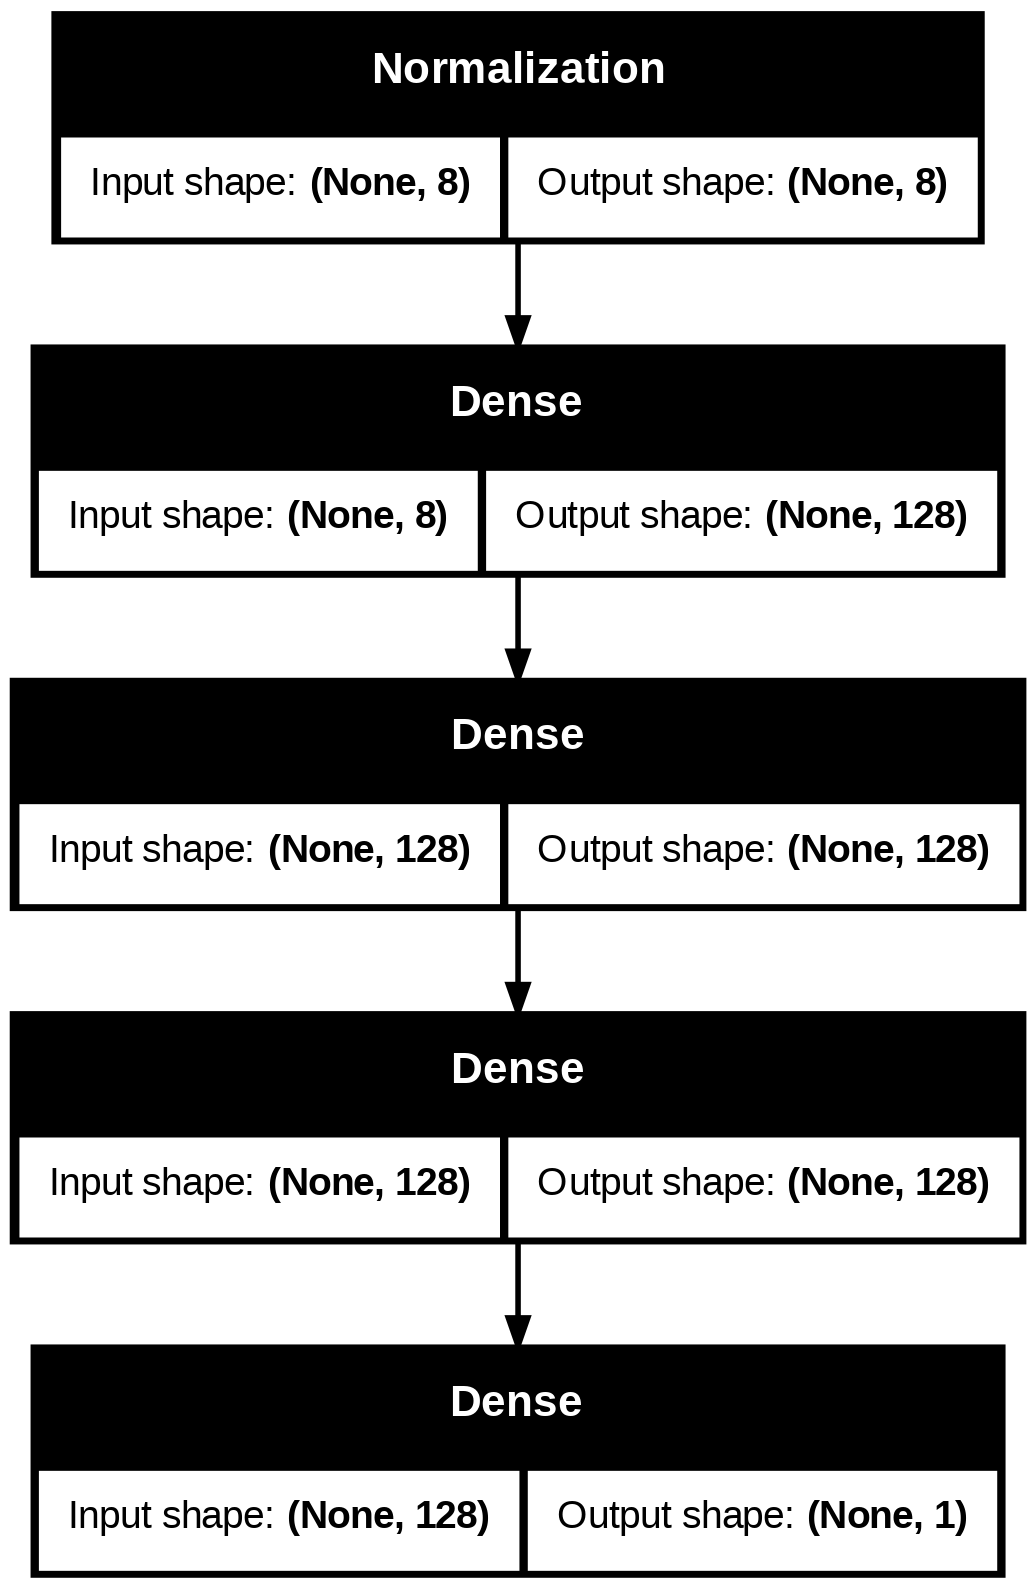

In [410]:

tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)


In [411]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = MeanAbsoluteError(),
              metrics = [RootMeanSquaredError()])

In [412]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 100, verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 227540.8281 - root_mean_squared_error: 268222.5938 - val_loss: 67734.2578 - val_root_mean_squared_error: 86911.8125
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64615.0742 - root_mean_squared_error: 83595.5000 - val_loss: 55976.3633 - val_root_mean_squared_error: 68739.3516
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 46301.7266 - root_mean_squared_error: 59034.2031 - val_loss: 47347.4258 - val_root_mean_squared_error: 57390.3906
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 43067.3281 - root_mean_squared_error: 55275.8438 - val_loss: 48448.5391 - val_root_mean_squared_error: 61053.2930
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43481.1250 - root_mean_squared_error: 54703.6055 - val_loss: 71920.6172 - val_root_mean_squared_error: 94338.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56766.4414 - root_mean_squared_error: 70959.1406 - val_loss: 42793.1992

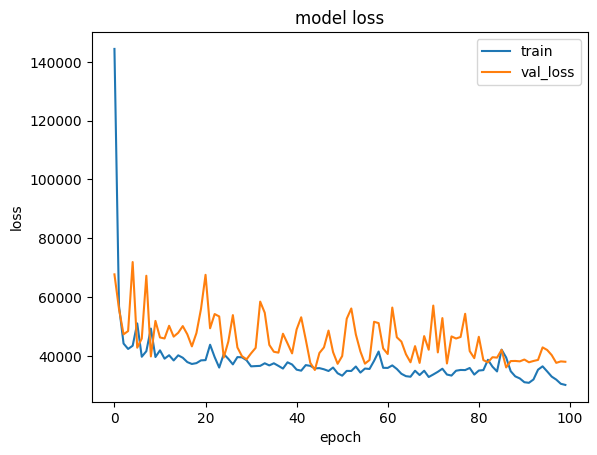

In [413]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

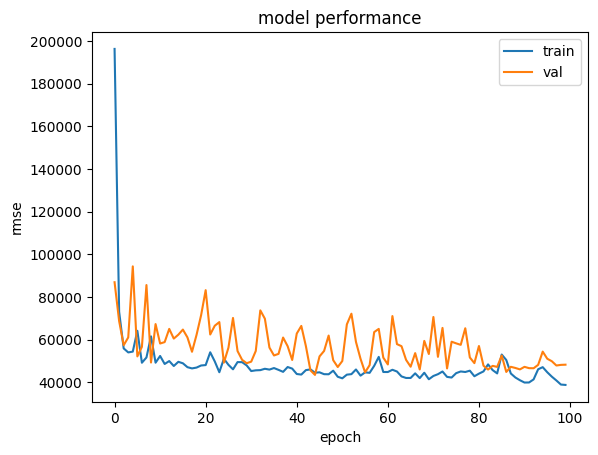

In [414]:

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()


#Model Evaluation and Testing

In [415]:
model.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41851.3594 - root_mean_squared_error: 48866.9375 


[42605.80078125, 49971.3828125]

In [416]:
X_test.shape


TensorShape([100, 8])

In [417]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[162351.89]], dtype=float32)

In [418]:
y_true = list(y_test[:,0].numpy())

In [419]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[162351.89, 440115.4, 277898.6, 148506.12, 407489.94, 385874.53, 167232.5, 120282.695, 125492.18, 375022.12, 480209.28, 177567.39, 473863.6, 460650.53, 179244.94, 419963.0, 409160.25, 457262.7, 332096.16, 334915.84, 142296.88, 225575.66, 293399.78, 359350.8, 530118.2, 305993.7, 178707.27, 249539.69, 211918.47, 112770.37, 339354.94, 151529.47, 293805.16, 264000.03, 457569.6, 229151.08, 165986.9, 167341.12, 197895.97, 517385.03, 230399.02, 132831.98, 408149.4, 170439.02, 413301.53, 468346.88, 436208.75, 225085.22, 403761.66, 325462.38, 479207.78, 174744.6, 309010.56, 165773.94, 452955.56, 322444.8, 515457.3, 484741.78, 558723.2, 490402.38, 175434.1, 309955.44, 501888.9, 500287.16, 176715.4, 117028.71, 154166.5, 113296.72, 152952.9, 142788.36, 338584.03, 297621.84, 125395.43, 499610.47, 386076.12, 249804.28, 446138.53, 187486.62, 435702.3, 291167.75, 226129.5, 301462.0, 473080.72, 109430.78, 552506.3, 138530.27, 403816.06, 330932.44, 156060.89, 197694

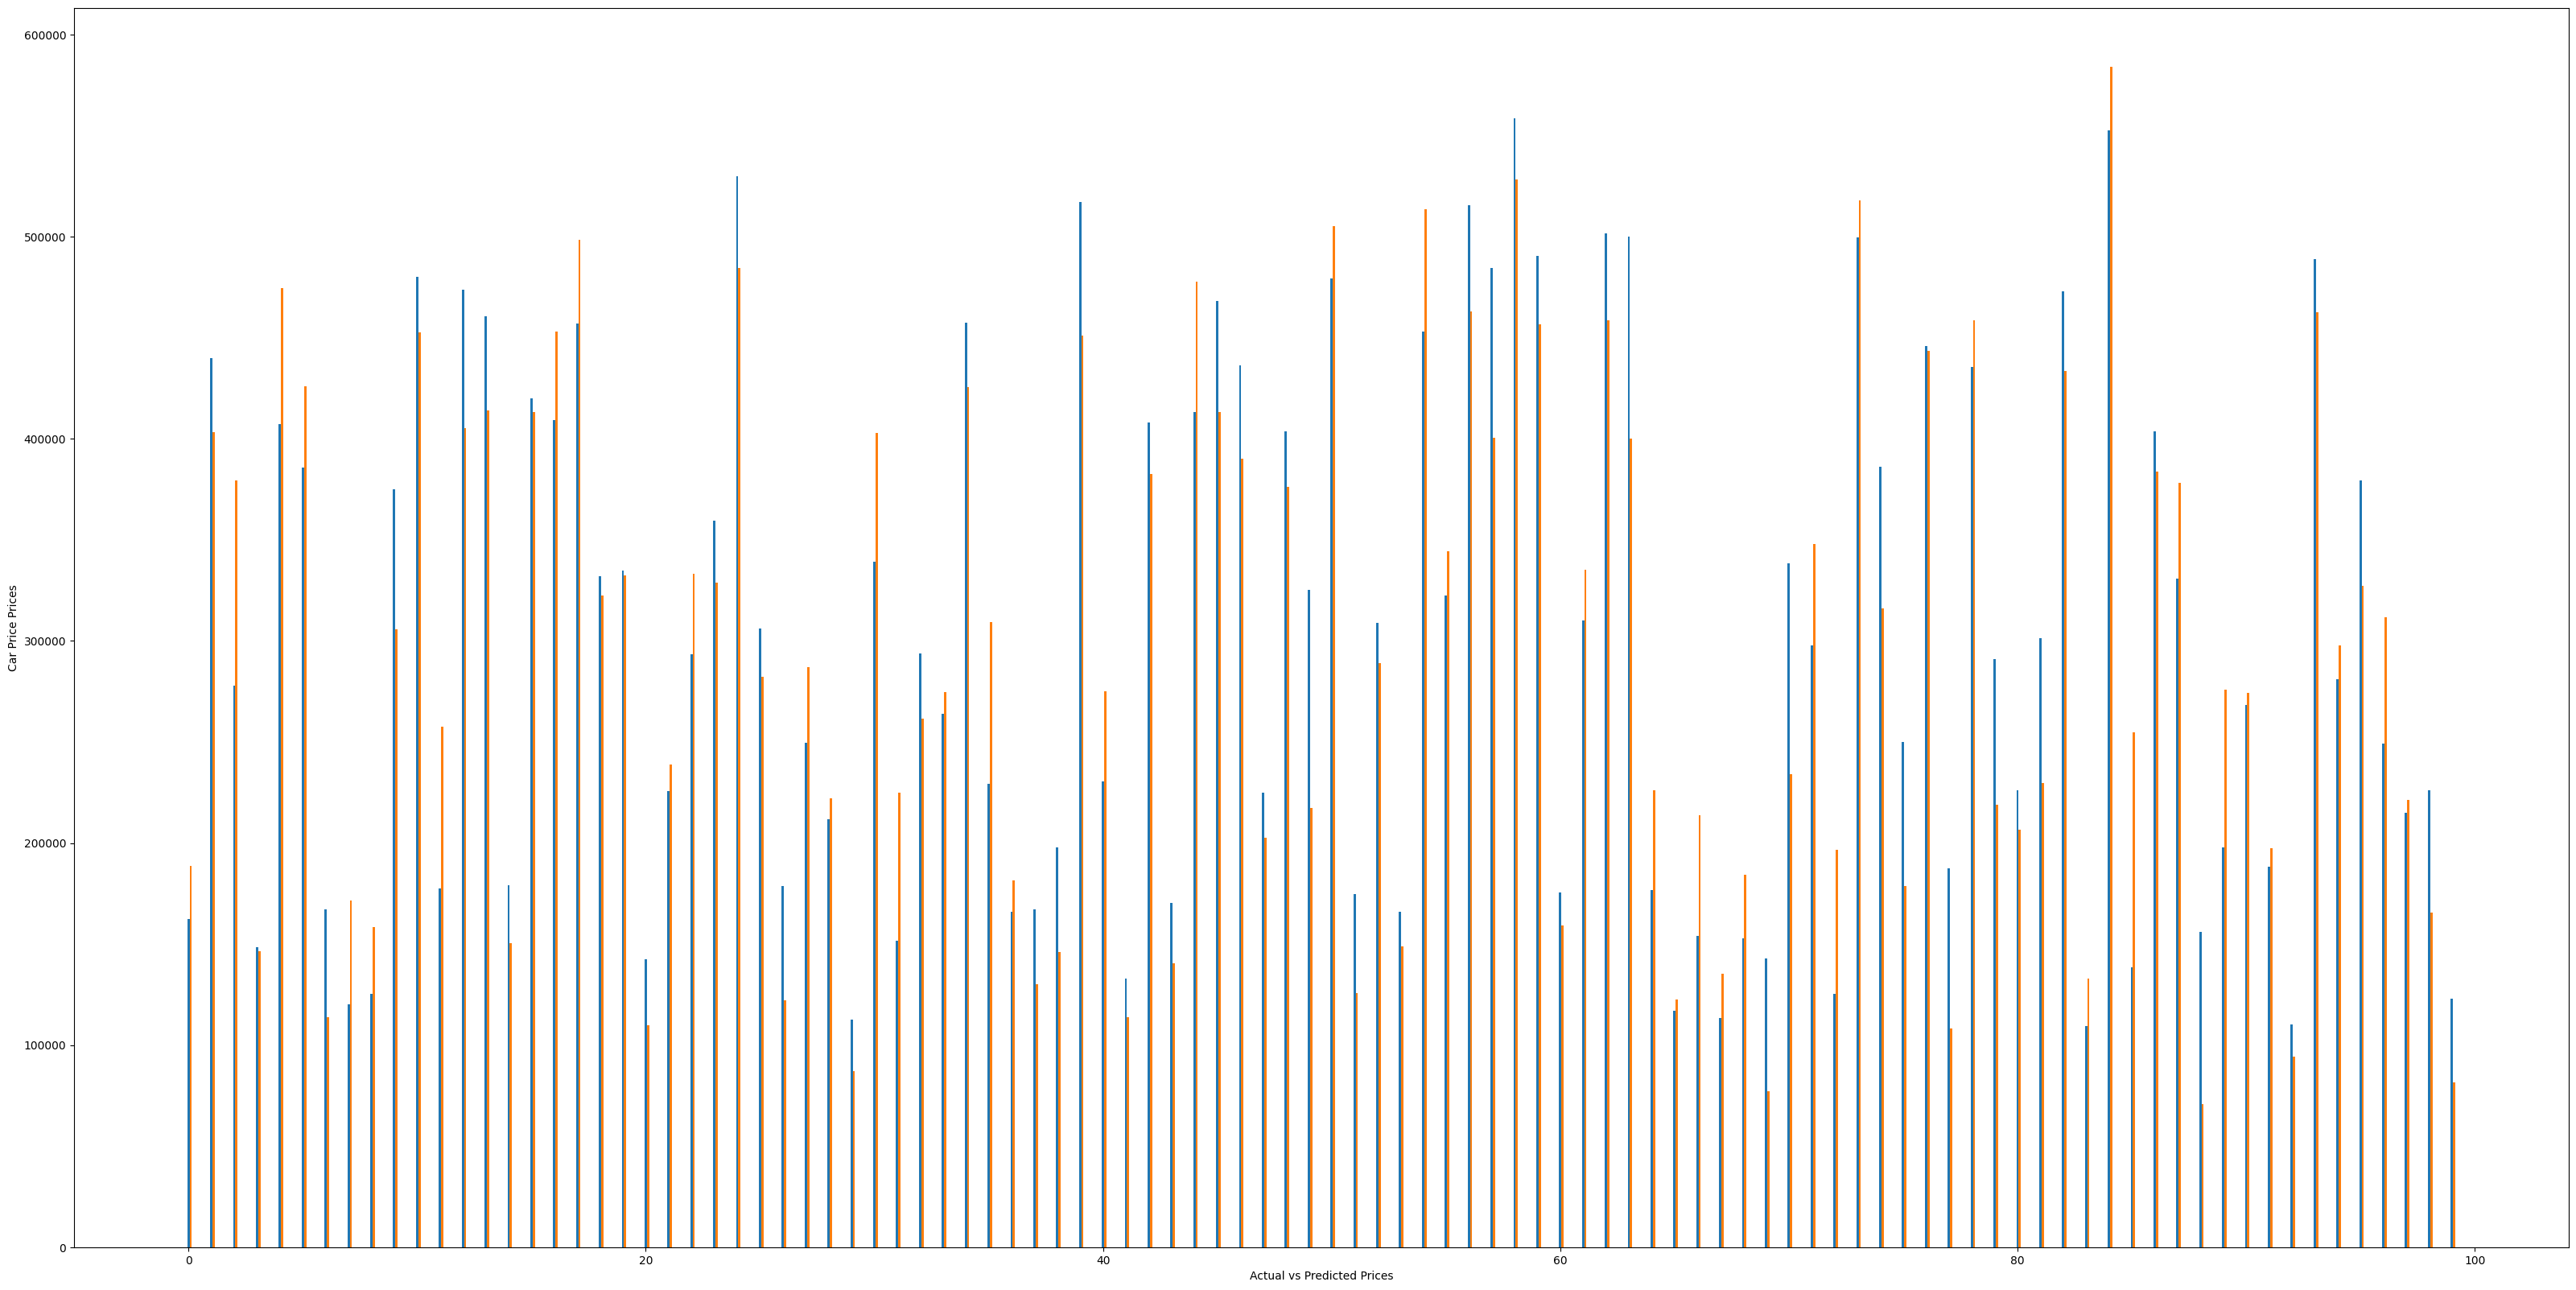

In [420]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

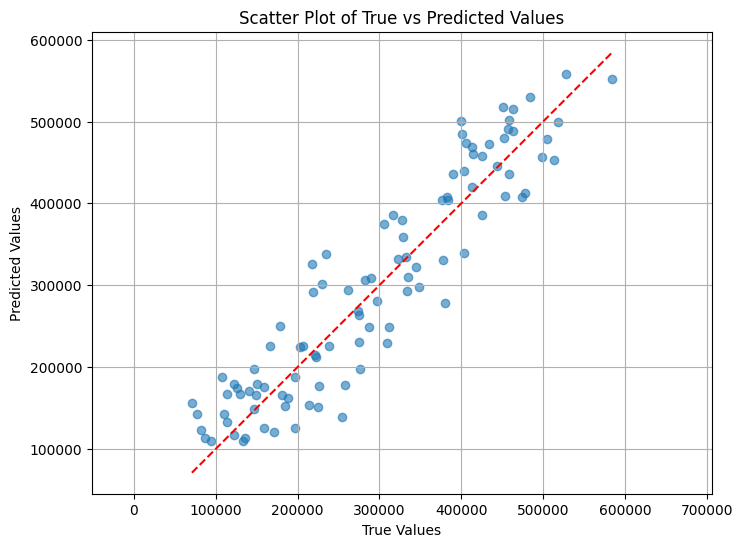

In [421]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.axis('equal')  # Ensures that the x and y axes are scaled equally
plt.show()

In [422]:


mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Output the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 42605.80078125
Mean Squared Error (MSE): 2497138944.0
Root Mean Squared Error (RMSE): 2497138944.0
R-squared (R²): 0.8545345090506555


In [423]:
y_train_pred = model.predict(X_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [424]:
y_train = list(y_train.numpy())  # Convert y_train to a list if it's a tensor
y_train_pred = list(y_train_pred[:, 0])  # Convert predictions to a list

In [425]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)  # RMSE
r2_train = r2_score(y_train, y_train_pred)

# Output the results for training data
print(f"Mean Absolute Error (MAE) on Training Data: {mae_train}")
print(f"Mean Squared Error (MSE) on Training Data: {mse_train}")
print(f"Root Mean Squared Error (RMSE) on Training Data: {rmse_train}")
print(f"R-squared (R²) on Training Data: {r2_train}")

Mean Absolute Error (MAE) on Training Data: 29169.482421875
Mean Squared Error (MSE) on Training Data: 1407382656.0
Root Mean Squared Error (RMSE) on Training Data: 37515.09765625
R-squared (R²) on Training Data: 0.9127150520520454


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
